   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Target
0  -0.430668   0.672873  -0.724280  -0.539630  -0.651600       0
1   0.211646  -0.843897   0.534794   0.825848   0.681953       1
2   1.092675   0.409106   1.100096  -0.942751  -0.981509       0
3   1.519901  -0.773361   1.998053   0.155132  -0.385314       0
4  -0.453901  -2.183473   0.244724   2.591239  -0.484234       1
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5      Target
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -0.031206    0.038332   -0.048848   -0.027714    0.029213    0.500000
std      0.894988    1.274375    1.230126    1.323957    1.007244    0.502519
min     -1.692005   -2.683180   -2.523434   -2.585909   -3.241267    0.000000
25%     -0.819243   -0.989945   -1.097573   -1.185113   -0.629925    0.000000
50%      0.098274   -0.098046   -0.035241    0.069846    0.054926    0.500000
75%      0.707311    1.190847    1.035708    1.089659    0.70151

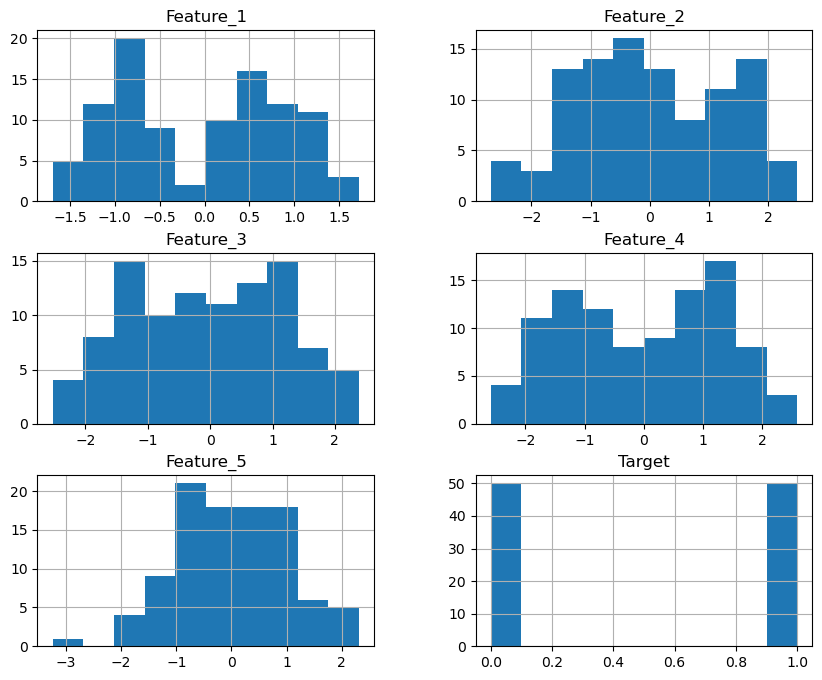

KeyError: "['target'] not found in axis"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
df = pd.read_csv(r"C:\Users\madha\Downloads\Day 47 Model_Validation_Data.csv")

print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize feature distributions
df.hist(figsize=(10, 8))
plt.show()

# Splitting the dataset
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cross_val_accuracy.mean()}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Score
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")
